# **Rock, Scissors, and Paper Classifier**

In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-06-02 15:39:54--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  12.2MB/s    in 30s     

2020-06-02 15:40:25 (10.3 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close() 
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [0]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(
        base_dir,  
        target_size=(100, 150),  
        shuffle=True,
        subset='training')
 
validation_generator = train_datagen.flow_from_directory(
        base_dir, 
        target_size=(100, 150), 
        subset='validation')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), 
                           activation='relu', 
                           input_shape=(100, 150, 3)
                           ),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 148, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 15, 128)        1

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [9]:
history = model.fit(
      train_generator,
      steps_per_epoch=20,  
      epochs=15,
      validation_data=validation_generator, 
      validation_steps=4,  
      verbose=2)

Epoch 1/15
20/20 - 4s - loss: 1.0946 - accuracy: 0.4203 - val_loss: 0.9813 - val_accuracy: 0.4531
Epoch 2/15
20/20 - 4s - loss: 0.9721 - accuracy: 0.5219 - val_loss: 0.7807 - val_accuracy: 0.7266
Epoch 3/15
20/20 - 4s - loss: 0.5066 - accuracy: 0.8304 - val_loss: 0.1999 - val_accuracy: 0.9297
Epoch 4/15
20/20 - 4s - loss: 0.3418 - accuracy: 0.8875 - val_loss: 0.2292 - val_accuracy: 0.9297
Epoch 5/15
20/20 - 4s - loss: 0.2233 - accuracy: 0.9255 - val_loss: 0.1557 - val_accuracy: 0.9453
Epoch 6/15
20/20 - 4s - loss: 0.2377 - accuracy: 0.9234 - val_loss: 0.1277 - val_accuracy: 0.9609
Epoch 7/15
20/20 - 4s - loss: 0.1762 - accuracy: 0.9556 - val_loss: 0.1236 - val_accuracy: 0.9531
Epoch 8/15
20/20 - 4s - loss: 0.1808 - accuracy: 0.9328 - val_loss: 0.1874 - val_accuracy: 0.9141
Epoch 9/15
20/20 - 4s - loss: 0.1822 - accuracy: 0.9422 - val_loss: 0.3340 - val_accuracy: 0.8906
Epoch 10/15
20/20 - 4s - loss: 0.1936 - accuracy: 0.9438 - val_loss: 0.2095 - val_accuracy: 0.9375
Epoch 11/15
20/20 -

In [10]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


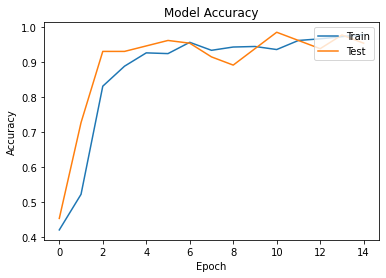

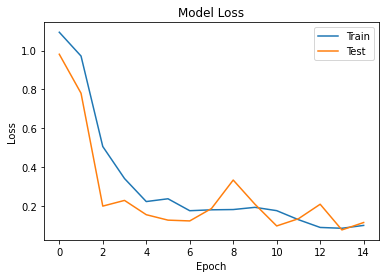

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Saving DSCF5091.JPG to DSCF5091.JPG
DSCF5091.JPG
rock


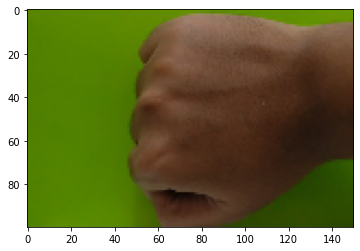

In [18]:
uploaded = files.upload()
 
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('N/A')